# Compare Embedding Experiment Runs for Next Word Prediction
- 03-02-20
- Joel Stremmel

**Problem Statement:** Because communication costs are steep in the federated setting, every round counts toward learning word representations.  We propose a simple method to leverage pretrained word representations in the federated setting to reduce training time and achieve a small increase in test accuracy.

**Experiments:** The experiments reported in this notebook consist of fitting an LSTM model as described in the research report using different embedding representations of words then fine tuning the embedding layer along with all other model layers over a fixed number of training rounds.  

**Results:** The notebook is divided into three results sections:

- Small network train and validation loss and accuracy
- Large network train and validation loss and accuracy
- Test set loss and accuracy on 1,000,000 test samples using the model that achieved the best validation set performance across training rounds

### Imports

In [1]:
import os, sys, io
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Accuracy and Loss Arrays from Small Model (Batch Size 16)

In [3]:
network = '100_256_100'

In [4]:
random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))
random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))
random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))
random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))

In [5]:
glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))
glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))
glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))
glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))

In [6]:
pca_fasttext_train_loss = np.load('embedding_layer_results/pca_fasttext_{}/train_loss.npy'.format(network))
pca_fasttext_train_accuracy = np.load('embedding_layer_results/pca_fasttext_{}/train_accuracy.npy'.format(network))
pca_fasttext_val_loss = np.load('embedding_layer_results/pca_fasttext_{}/val_loss.npy'.format(network))
pca_fasttext_val_accuracy = np.load('embedding_layer_results/pca_fasttext_{}/val_accuracy.npy'.format(network))

In [7]:
pp_pca_pp_fasttext_train_loss = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/train_loss.npy'.format(network))
pp_pca_pp_fasttext_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/train_accuracy.npy'.format(network))
pp_pca_pp_fasttext_val_loss = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/val_loss.npy'.format(network))
pp_pca_pp_fasttext_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/val_accuracy.npy'.format(network))

In [8]:
pca_gpt2_train_loss = np.load('embedding_layer_results/pca_gpt2_{}/train_loss.npy'.format(network))
pca_gpt2_train_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/train_accuracy.npy'.format(network))
pca_gpt2_val_loss = np.load('embedding_layer_results/pca_gpt2_{}/val_loss.npy'.format(network))
pca_gpt2_val_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/val_accuracy.npy'.format(network))

In [9]:
pp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))
pp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))
pp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))
pp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))

### Load Accuracy and Loss Arrays from Large Model (Batch Size 16)

In [10]:
network = '300_512_300'

In [11]:
lrandom_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))
lrandom_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))
lrandom_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))
lrandom_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))

In [12]:
lglove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))
lglove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))
lglove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))
lglove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))

In [13]:
lfasttext_train_loss = np.load('embedding_layer_results/fasttext_{}/train_loss.npy'.format(network))
lfasttext_train_accuracy = np.load('embedding_layer_results/fasttext_{}/train_accuracy.npy'.format(network))
lfasttext_val_loss = np.load('embedding_layer_results/fasttext_{}/val_loss.npy'.format(network))
lfasttext_val_accuracy = np.load('embedding_layer_results/fasttext_{}/val_accuracy.npy'.format(network))

In [14]:
lpca_gpt2_train_loss = np.load('embedding_layer_results/pca_gpt2_{}/train_loss.npy'.format(network))
lpca_gpt2_train_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/train_accuracy.npy'.format(network))
lpca_gpt2_val_loss = np.load('embedding_layer_results/pca_gpt2_{}/val_loss.npy'.format(network))
lpca_gpt2_val_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/val_accuracy.npy'.format(network))

In [15]:
lpp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))
lpp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))
lpp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))
lpp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))

### Generate Plot Grid

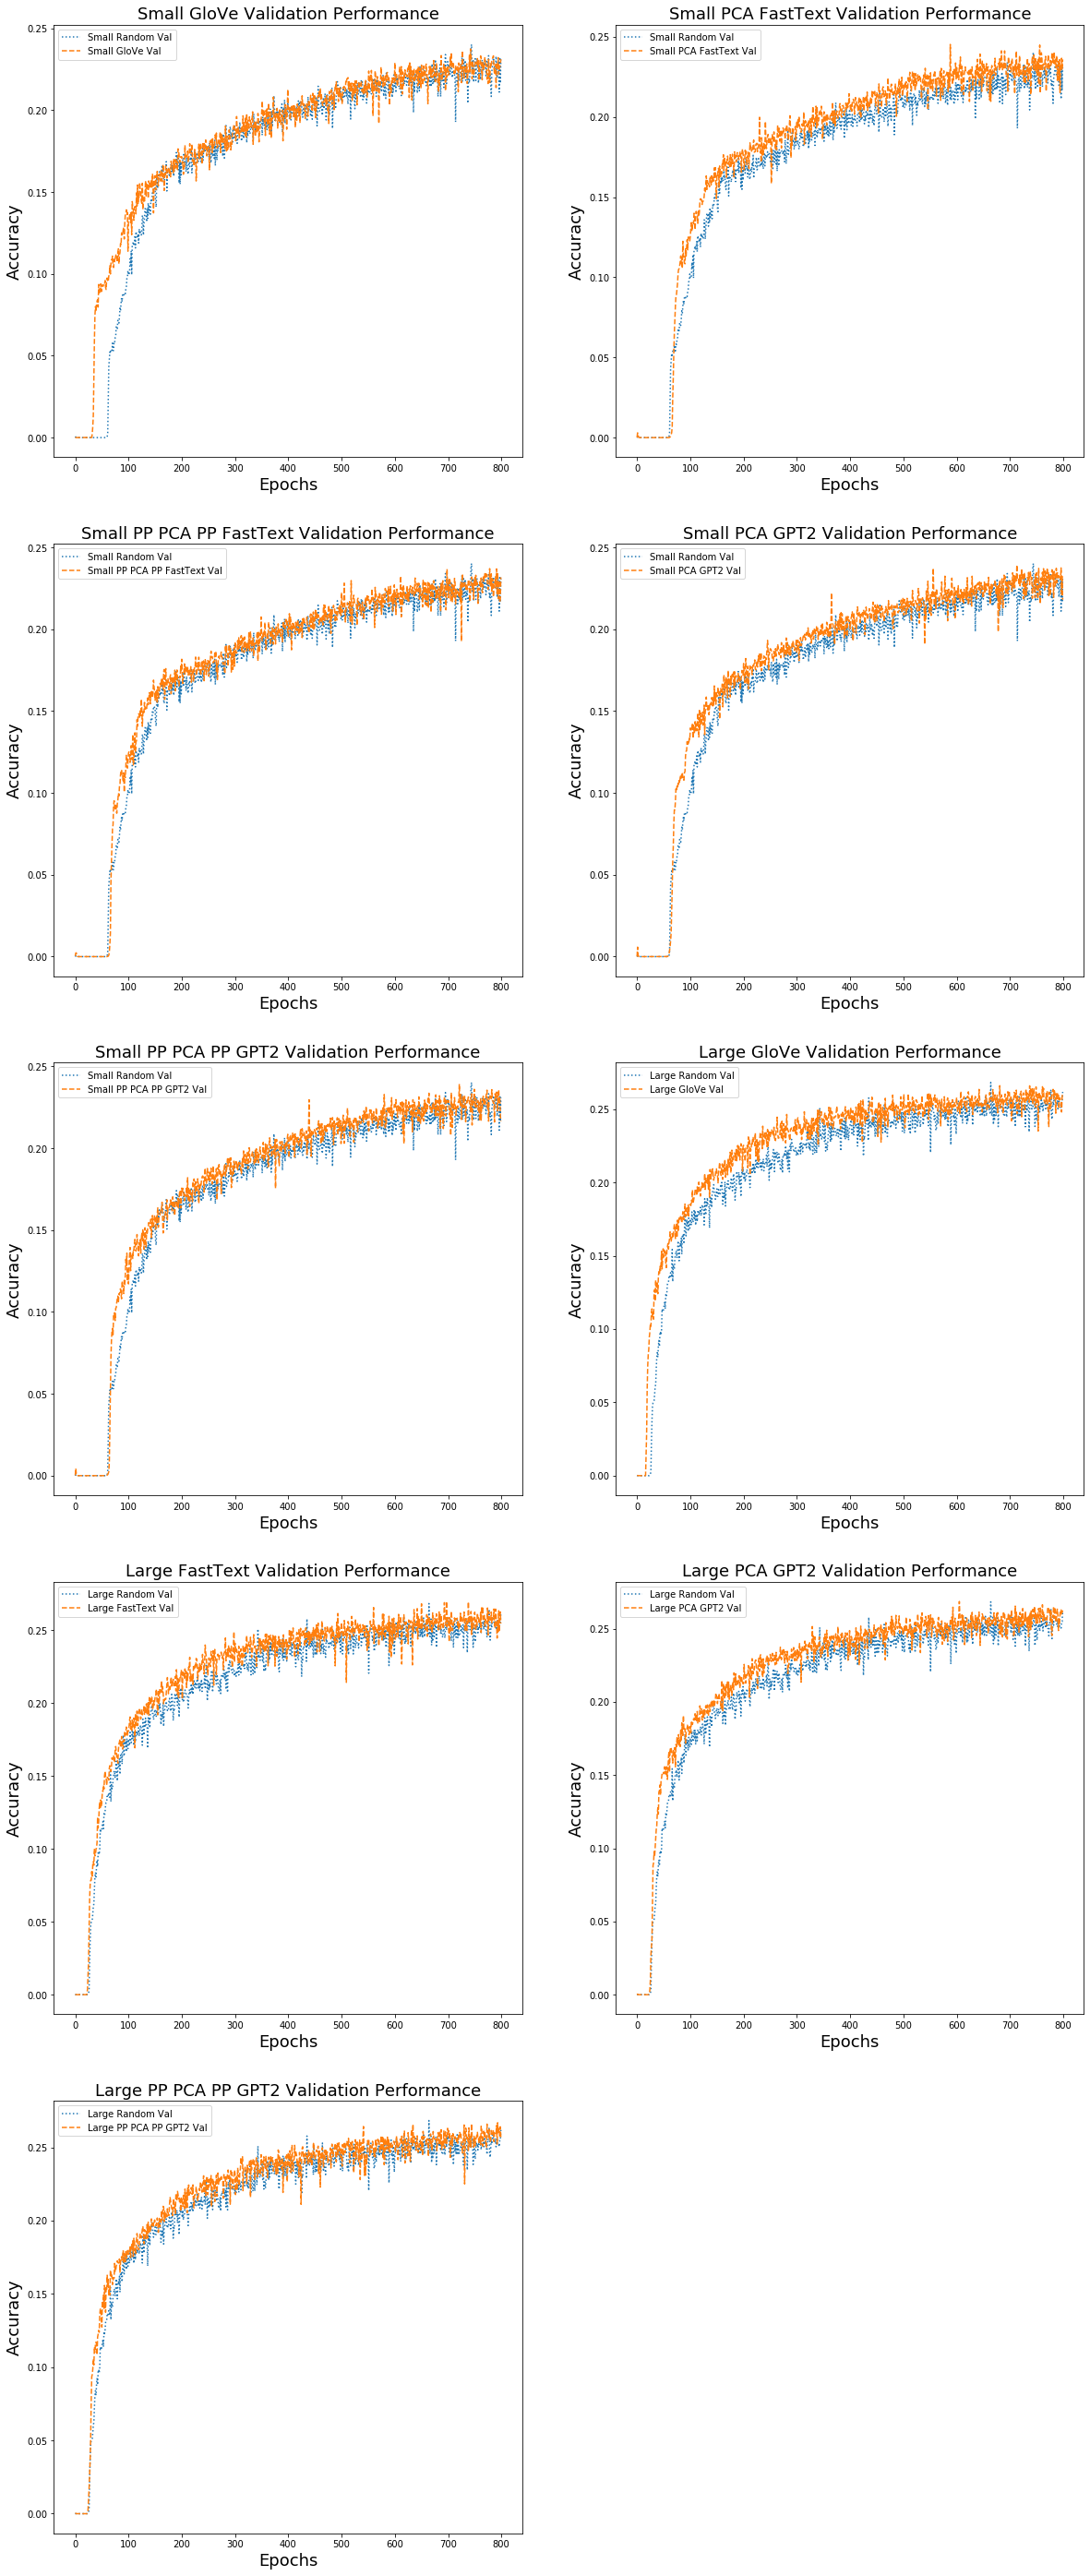

In [16]:
x_axis = range(0, len(random_train_accuracy))

titles = ['Small GloVe Validation Performance',
          'Small PCA FastText Validation Performance',
          'Small PP PCA PP FastText Validation Performance',
          'Small PCA GPT2 Validation Performance',
          'Small PP PCA PP GPT2 Validation Performance',
          'Large GloVe Validation Performance',
          'Large FastText Validation Performance',
          'Large PCA GPT2 Validation Performance',
          'Large PP PCA PP GPT2 Validation Performance']

labels = ['Small GloVe Val',
          'Small PCA FastText Val',
          'Small PP PCA PP FastText Val',
          'Small PCA GPT2 Val',
          'Small PP PCA PP GPT2 Val',
          'Large GloVe Val',
          'Large FastText Val',
          'Large PCA GPT2 Val',
          'Large PP PCA PP GPT2 Val']
    

results = [glove_val_accuracy,
           pca_fasttext_val_accuracy,
           pp_pca_pp_fasttext_val_accuracy,
           pca_gpt2_val_accuracy,
           pp_pca_pp_gpt2_val_accuracy,
           lglove_val_accuracy,
           lfasttext_val_accuracy,
           lpca_gpt2_val_accuracy,
           lpp_pca_pp_gpt2_val_accuracy]

fig, axs = plt.subplots(5,2)
fig.set_size_inches(20, 50)
axs = axs.ravel()

for i, ax in enumerate(axs[:-1]):
    
    if i in list(range(0, 5)):
        ax.plot(x_axis, random_val_accuracy, label='Small Random Val', linestyle=':')
    elif i in list(range(5, 9)):
        ax.plot(x_axis, lrandom_val_accuracy, label='Large Random Val', linestyle=':')
    else:
        print('Value {} not expected.  No baseline was plotted.'.format(i))
                 
    ax.plot(x_axis, results[i], label=labels[i], linestyle='--')
    ax.set_title(titles[i], fontsize=18)
    ax.set_xlabel('Epochs', fontsize=18)
    ax.set_ylabel('Accuracy', fontsize=18)
    
    ax.legend()

fig.delaxes(axs[-1])
plt.show()
fig.savefig('small_emb_results_grid.png')

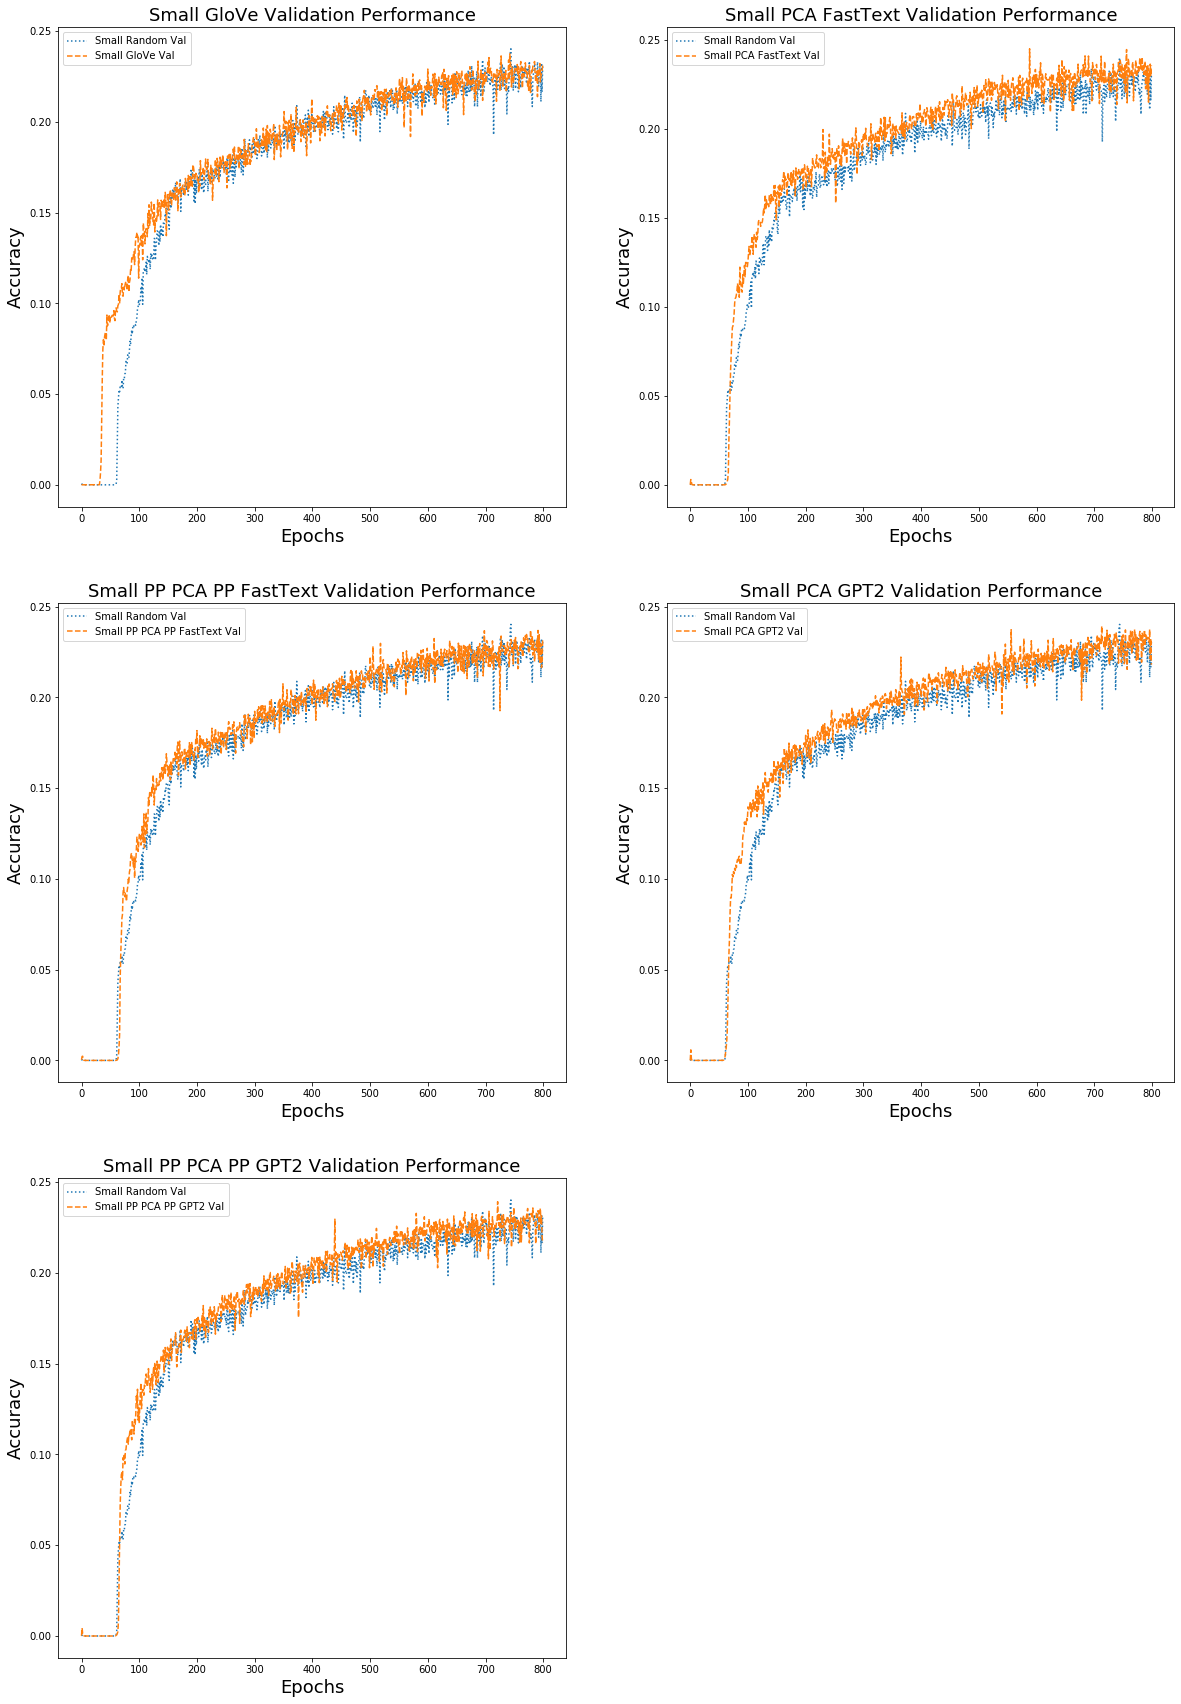

In [17]:
x_axis = range(0, len(random_train_accuracy))

titles = ['Small GloVe Validation Performance',
          'Small PCA FastText Validation Performance',
          'Small PP PCA PP FastText Validation Performance',
          'Small PCA GPT2 Validation Performance',
          'Small PP PCA PP GPT2 Validation Performance']

labels = ['Small GloVe Val',
          'Small PCA FastText Val',
          'Small PP PCA PP FastText Val',
          'Small PCA GPT2 Val',
          'Small PP PCA PP GPT2 Val']
    

results = [glove_val_accuracy,
           pca_fasttext_val_accuracy,
           pp_pca_pp_fasttext_val_accuracy,
           pca_gpt2_val_accuracy,
           pp_pca_pp_gpt2_val_accuracy]

fig, axs = plt.subplots(3,2)
fig.set_size_inches(20, 30)
axs = axs.ravel()

for i, ax in enumerate(axs[:-1]):
    
    ax.plot(x_axis, random_val_accuracy, label='Small Random Val', linestyle=':')       
    ax.plot(x_axis, results[i], label=labels[i], linestyle='--')
    ax.set_title(titles[i], fontsize=18)
    ax.set_xlabel('Epochs', fontsize=18)
    ax.set_ylabel('Accuracy', fontsize=18)
    
    ax.legend()

fig.delaxes(axs[-1])
plt.show()
fig.savefig('small_emb_results_grid.png')
fig.tight_layout()

In [ ]:
x_axis = range(0, len(random_train_accuracy))

titles = ['Large GloVe Validation Performance',
          'Large FastText Validation Performance',
          'Large PCA GPT2 Validation Performance',
          'Large PP PCA PP GPT2 Validation Performance']

labels = ['Large GloVe Val',
          'Large FastText Val',
          'Large PCA GPT2 Val',
          'Large PP PCA PP GPT2 Val']
    

results = [lglove_val_accuracy,
           lfasttext_val_accuracy,
           lpca_gpt2_val_accuracy,
           lpp_pca_pp_gpt2_val_accuracy]

fig, axs = plt.subplots(2,2)
fig.set_size_inches(20, 20)
axs = axs.ravel()

for i, ax in enumerate(axs):
    
    ax.plot(x_axis, lrandom_val_accuracy, label='Large Random Val', linestyle=':')
                 
    ax.plot(x_axis, results[i], label=labels[i], linestyle='--')
    ax.set_title(titles[i], fontsize=18)
    ax.set_xlabel('Epochs', fontsize=18)
    ax.set_ylabel('Accuracy', fontsize=18)
    
    ax.legend()

plt.show()
fig.savefig('large_emb_results_grid.png')
fig.tight_layout()